In [2]:
pip install requests matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.2 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Starting load test for 30 seconds...
Request 1: 112.38ms
Request 2: 335.66ms
Request 3: 142.63ms
Request 4: 102.86ms
Request 5: 77.93ms
Request 6: 77.18ms
Request 7: 243.81ms
Request 8: 148.09ms
Request 9: 191.86ms
Request 10: 245.99ms
Request 11: 205.69ms
Request 12: 527.97ms
Request 13: 71.53ms
Request 14: 73.59ms
Request 15: 131.14ms
Request 16: 69.45ms
Request 17: 70.82ms
Request 18: 386.36ms
Request 19: 122.78ms
Request 20: 104.36ms
Request 21: 390.13ms
Request 22: 164.85ms
Request 23: 245.93ms
Request 24: 127.20ms
Request 25: 85.59ms
Request 26: 85.76ms
Request 27: 148.97ms
Request 28: 263.08ms
Request 29: 275.35ms
Request 30: 176.07ms
Request 31: 144.42ms
Request 32: 459.90ms
Request 33: 93.27ms
Request 34: 158.46ms
Request 35: 80.65ms
Request 36: 241.06ms
Request 37: 471.33ms
Request 38: 223.34ms
Request 39: 239.91ms
Request 40: 115.49ms
Request 41: 88.17ms
Request 42: 832.13ms
Request 43: 106.54ms
Request 44: 120.94ms
Request 45: 320.92ms
Request 46: 151.54ms
Request 47: 74.79

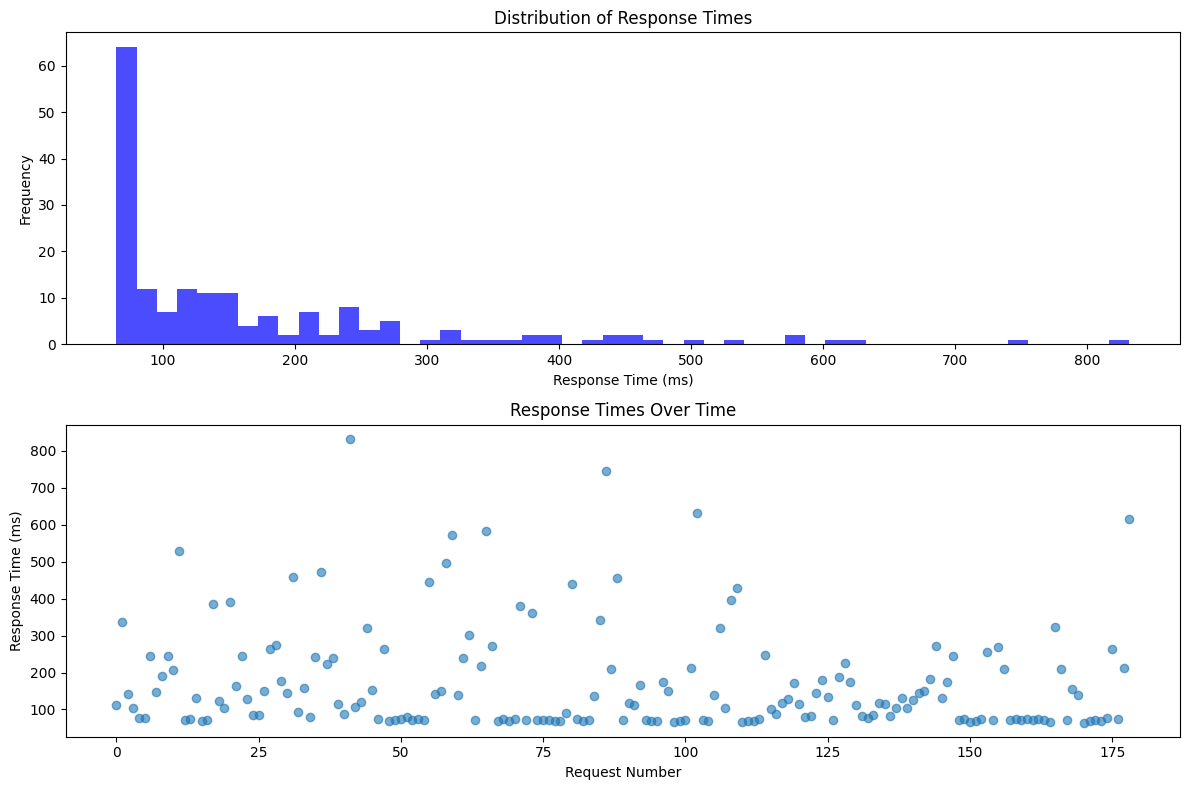


Statistics:
Total requests: 179
Average response time: 170.50ms
Median response time: 116.24ms
95th percentile: 461.05ms
99th percentile: 657.21ms
Max response time: 832.13ms


In [4]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def load_test(url, duration_seconds=30):
    response_times = []
    start_time = time.time()
    end_time = start_time + duration_seconds
    
    print(f"Starting load test for {duration_seconds} seconds...")
    
    while time.time() < end_time:
        try:
            start_request = time.time()
            response = requests.get(url, timeout=10)
            end_request = time.time()
            
            response_time = (end_request - start_request) * 1000  # Convert to milliseconds
            response_times.append(response_time)
            
            if response.status_code == 200:
                print(f"Request {len(response_times)}: {response_time:.2f}ms")
            else:
                print(f"Request {len(response_times)}: Failed with status {response.status_code}")
                
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            
    return response_times

# Replace with your EC2 public IP
EC2_URL = "http://35.88.130.89:8080/albums"

# Run the test
response_times = load_test(EC2_URL)

# Plot the results
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 1, 1)
plt.hist(response_times, bins=50, alpha=0.7, color='blue')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')

# Scatter plot over time
plt.subplot(2, 1, 2)
plt.scatter(range(len(response_times)), response_times, alpha=0.6)
plt.xlabel('Request Number')
plt.ylabel('Response Time (ms)')
plt.title('Response Times Over Time')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nStatistics:")
print(f"Total requests: {len(response_times)}")
print(f"Average response time: {np.mean(response_times):.2f}ms")
print(f"Median response time: {np.median(response_times):.2f}ms")
print(f"95th percentile: {np.percentile(response_times, 95):.2f}ms")
print(f"99th percentile: {np.percentile(response_times, 99):.2f}ms")
print(f"Max response time: {max(response_times):.2f}ms")